In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("extendedData.csv").dropna()

/home/ejmejm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Shuffle the data

data = data.sample(frac=1, random_state=42)

In [4]:
data.head()

,Unnamed: 0,id,city,DOB,address,longitude,sex,state,latitude,name,...,R04.2,G47.33,R00.0,R19.7,E11.65,B20.1,M05.10,F14.121,F10.121,N18.9
805787,805787,391405,Rufe,1982-05-08T22:11:38Z,22728 YOLO STREET,-95,F,Oklahoma,34,"LIPSCOMB,HADEEL",...,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,3.0,2.0
508019,508019,1457214,Forestville,1945-06-08T22:11:38Z,2425 APACHE STREET,-80,M,Pennsylvania,41,"CLOWES,MIKAYLA J",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0
94025,94025,108462,Brockton,1989-05-08T22:11:38Z,3428 EVERGREEN CIRCLE #2,-105,M,Montana,48,"BELIHU,JOCQUAN J",...,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
332245,332245,1299018,Delton,1956-06-08T22:11:38Z,110 STONEPINE LANE,-85,M,Michigan,43,"VORONOVA,NAINA N",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0
482390,482390,1434148,Canmer,1949-12-08T22:11:38Z,11638 OLD SPRUCE,-86,M,Kentucky,37,"EASTER,ANNA G",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0


In [6]:
def tobaccoConv(x):
    if x.lower() == "yes":
        return True
    if x.lower() == "no":
        return False
    return np.nan

data["TOBACCO"] = data["TOBACCO"].apply(lambda row: tobaccoConv (row))

In [ ]:
def riskCounter(x):
    return int(x["B20.1"] + x["E11.65"] + x["F10.121"] + x["F14.121"] + \
        x["M05.10"] + x["N18.9"] + \
        x["R00.0"] + x["R00.8"] + x["R04.2"] + x["R19.7"] + \
        x["S62.308"] + x["T84.011"] + x["T85.622"] + x["Z91.010"])

data["RISK_FACTOR"] = data.apply(lambda row: riskCounter(row), axis=1)

In [75]:
# Converting data to numeric format

data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
data["PLATINUM"] = pd.to_numeric(data["PLATINUM"], errors="coerce")
data["WEIGHT"] = pd.to_numeric(data["WEIGHT"], errors="coerce")
data["HEIGHT"] = pd.to_numeric(data["HEIGHT"], errors="coerce")
data["latitude"] = pd.to_numeric(data["latitude"], errors="coerce")
data["longitude"] = pd.to_numeric(data["longitude"], errors="coerce")
data["ANNUAL_INCOME"] = pd.to_numeric(data["ANNUAL_INCOME"], errors="coerce")

In [88]:
# Add attributes

data["age"] = data.apply(lambda row: 2017 - int(row["DOB"][:4]), axis=1)
data["bmi"] = data.apply(lambda row: row["WEIGHT"] / row["HEIGHT"], axis=1)
data["plan_multiple"] = data.apply(lambda row: row["SILVER"] - row["BRONZE"], axis=1)
data["personal_risk"] = data.apply(lambda row: row["BRONZE"] - row["plan_multiple"], axis=1)

In [102]:
data = data.dropna()

# Risk Factor Distribution

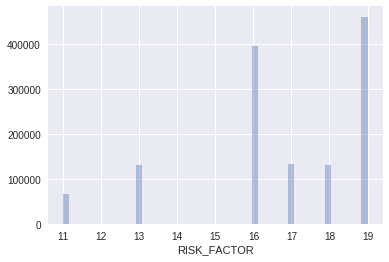

In [12]:
sns.distplot(data["RISK_FACTOR"], kde=False)

# Plan Count

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f17e0dffa58>>
Traceback (most recent call last):
  File "/home/ejmejm/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


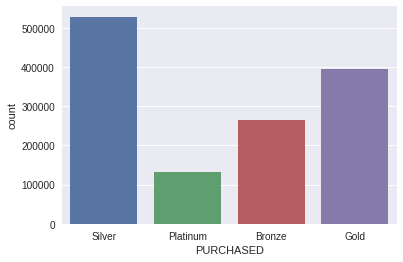

In [63]:
sns.countplot(x=data["PURCHASED"])

# Plan Pricing Distributions

(0, 150)

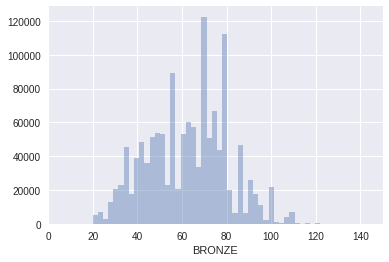

In [13]:
sns.distplot(data["BRONZE"], kde=False)
sns.plt.xlim(0, 150)

(0, 200)

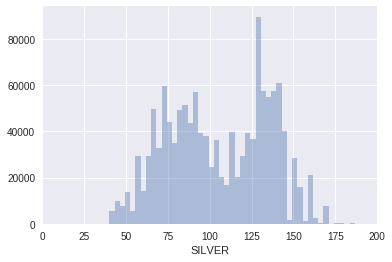

In [14]:
sns.distplot(data["SILVER"], kde=False)
sns.plt.xlim(0, 200)

(0, 300)

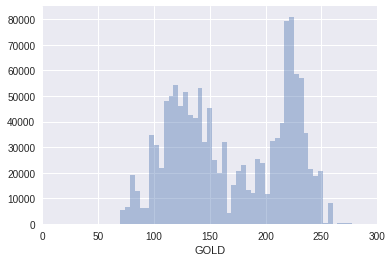

In [15]:
sns.distplot(data["GOLD"], kde=False)
sns.plt.xlim(0, 300)

(0, 450)

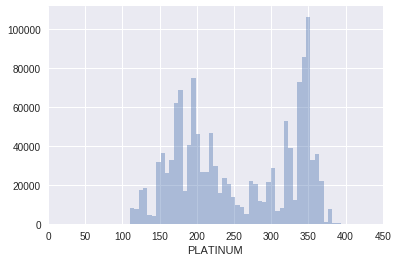

In [16]:
sns.distplot(data["PLATINUM"], kde=False)
sns.plt.xlim(0, 450)

(0, 420)

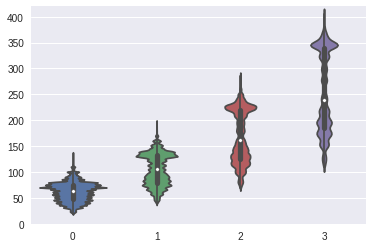

In [18]:
sns.violinplot(data=[data["BRONZE"], data["SILVER"], data["GOLD"], data["PLATINUM"]])
sns.plt.ylim(0, 420)

In [86]:
pData = data.sample(n=1000)

# Tobacco, BMI, and Age correlations with premium price

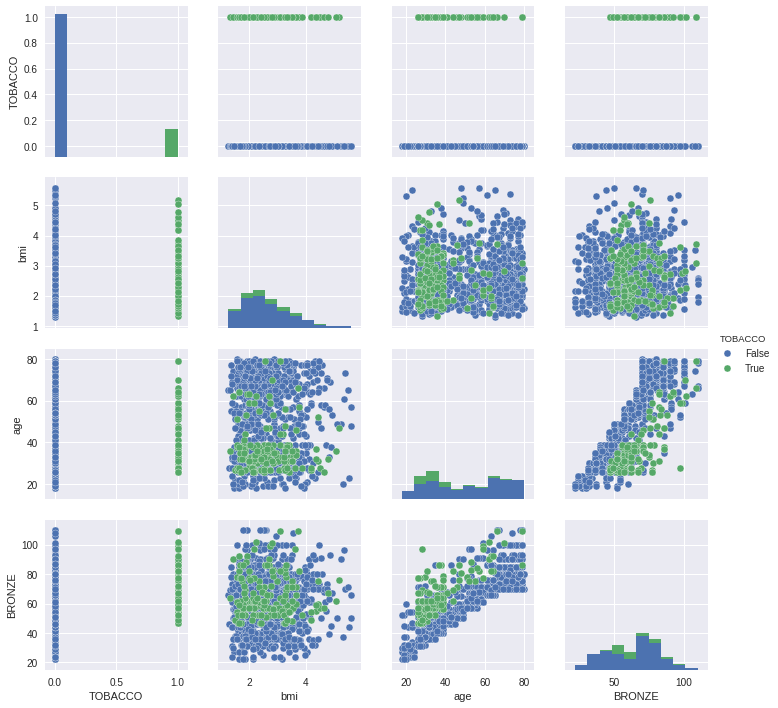

In [87]:
sns.pairplot(pData[["TOBACCO", "bmi", "age", "BRONZE"]], hue="TOBACCO")

# Total risk severity vs. premium price

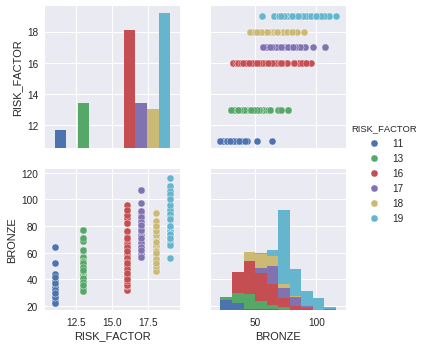

In [73]:
sns.pairplot(pData[["RISK_FACTOR", "BRONZE"]], hue="RISK_FACTOR")

# Correlation Analysis

In [118]:
print("Correlation with bronze premium:")

corr_x = []
corr_y = []

for column in data:
    if data[column].dtype in (np.int64, np.float64) and \
    column not in ("BRONZE", "SILVER", "GOLD", "PLATINUM", "personal_risk"):
        corr = data["BRONZE"].corr(data[column])
        corr_x.append(column)
        corr_y.append(abs(corr))
        print("{}: {}".format(column, corr))

Correlation with bronze premium:
Unnamed: 0: -0.28563333505468075
id: 0.7493734953325469
longitude: 0.5537992188324524
latitude: 0.06602011062679046
PEOPLE_COVERED: 0.29634106554671225
ANNUAL_INCOME: -0.0015910724404990747
HEIGHT: -0.00017292762129769918
WEIGHT: -0.0011874594985856026
S62.308: -0.4876093082742357
G80.4: nan
R00.8: -0.4876093082742357
T85.622: -0.37670133661638955
Z91.010: -0.37670133661638955
T84.011: -0.37670133661638955
R04.2: -0.7126106673478924
G47.33: nan
R00.0: -0.6882631200492524
R19.7: -0.6646835305037002
E11.65: 0.37670133661638955
B20.1: 0.3767013366163727
M05.10: 0.6646835305037039
F14.121: 0.6882631200492486
F10.121: 0.487609308274233
N18.9: 0.4876093082742357
RISK_FACTOR: 0.7271391036089688
age: 0.7769810621782935
bmi: -0.001136655287944184
plan_multiple: 0.7855235680457346


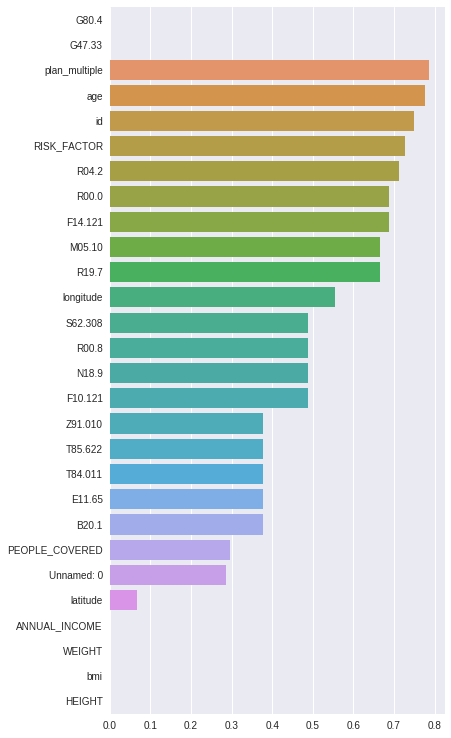

In [135]:
g_corr_x = []
g_corr_y = []
for y, x in sorted(zip(corr_y, corr_x), reverse=True):
    g_corr_x.append(x)
    g_corr_y.append(y)


f, ax = plt.subplots(figsize=(6, 13))
sns.barplot(y=g_corr_x, x=g_corr_y)
sns.despine(left=True, bottom=True)

# Classification of plan purchased

In [19]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

/home/ejmejm/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
names = ["XGBoost", 
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [21]:
classifiers = [
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [150]:
classSamples = data.sample(n=20000)

In [80]:
import warnings
warnings.filterwarnings('ignore')
X = classSamples[["ANNUAL_INCOME", "RISK_FACTOR", "age"]]
y = classSamples["PURCHASED"]

le = LabelEncoder()
# for column in X:
#     X[column] = le.fit_transform(X[column])
#     X[column] = StandardScaler().fit_transform(X[column])
#X["TOBACCO"] = le.fit_transform(X["TOBACCO"])
#X[:100]

# for i, val in enumerate(y):
#     if y[i] == "Bronze":

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [82]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.41175

In [25]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{}: {}".format(name, score))

XGBoost: 0.38925
Nearest Neighbors: 0.29975
Linear SVM: 0.38925
RBF SVM: 0.384
Decision Tree: 0.38425
Random Forest: 0.3905
Neural Net: 0.358
AdaBoost: 0.38925
Naive Bayes: 0.379
QDA: 0.31275


# Regression for premium pricing

In [151]:
from sklearn import linear_model

In [153]:
import warnings
warnings.filterwarnings('ignore')
X_reg = classSamples[["age", "RISK_FACTOR", "R04.2", "R00.0", "F14.121",
                      "M05.10", "R19.7", "longitude"]]
y_reg = classSamples["BRONZE"]

#X_reg["TOBACCO"] = le.fit_transform(X_reg["TOBACCO"])

In [154]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42)

In [155]:
reg = linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
predictions = reg.predict(X_test_reg)
errors = abs(predictions - y_test_reg.values)

In [157]:
print("Mean error:", np.mean(errors))
print("Error stddev:", np.std(errors))

Mean error: 8.8220627887
Error stddev: 6.85339177411


In [161]:
print("Mean error:", np.mean(data["BRONZE"]))
print("Error stddev:", np.std(data["BRONZE"]))



17.984674518557238

In [ ]:
import tensorflow as tf
import tflearn

In [ ]:
inp = tflearn.input_data(shape=[None, 3])

net = tflearn.fully_connected(inp, 64, activation="relu")
net = tflearn.fully_connected(net, 64, activation="relu")
net = tflearn.fully_connected(net, 32, activation="relu")
net = tflearn.fully_connected(net, 1, activation="relu")
net = tflearn.regression(net)

model = tflearn.DNN(net)

In [ ]:
xvals = X_train_reg.values
yvals = y_train_reg.values.reshape([-1, 1])

In [ ]:
yvals

In [ ]:
model.fit(xvals, yvals)

In [ ]:
model.predict(X_test_reg[:5])

In [ ]:
y_test_reg